In [1]:
import cv2
import numpy as np
from pprint import pprint
from utils.transfrom import TransformUtils, TransType
from scipy.linalg import hadamard

trans_utils = TransformUtils()
hw3_1_matrix = np.array([[0, 1, 1, 0], [0, 1, 1, 0], [0, 1, 1, 0], [0, 1, 1, 0]])
hw1_matrix_float = np.float32(hw3_1_matrix)

In [2]:
dft_matrix = trans_utils.getMatrix(type=TransType.DFT, size=4)
dct_matrix = trans_utils.getMatrix(type=TransType.DCT, size=4)
hadamard_matrix = trans_utils.getMatrix(type=TransType.HADAMARD, size=4)
haar_matrix = trans_utils.getMatrix(type=TransType.HAAR, size=4)

In [ ]:
my_dft_matrix = np.dot(np.dot(dft_matrix, hw3_1_matrix), dft_matrix)
np_dft_matrix = cv2.dft(hw1_matrix_float, flags=cv2.DFT_COMPLEX_OUTPUT)

# 对比自己实现的DFT和OpenCV的DFT
# 将小数点限制为3位
my_dft_matrix_rounded = np.round(my_dft_matrix, 3)
np_dft_matrix_rounded = np.round(np_dft_matrix, 3)

print('my_dft_matrix (rounded):')
pprint(my_dft_matrix_rounded)
print('np_dft_matrix (rounded):')
pprint(np_dft_matrix_rounded)

In [ ]:
my_dct_matrix = np.dot(np.dot(dct_matrix, hw3_1_matrix), dct_matrix.T)
np_dct_matrix = cv2.dct(hw1_matrix_float)

# 对比自己实现的DCT和OpenCV的DCT
# 将小数点限制为3位
my_dct_matrix_rounded = np.round(my_dct_matrix, 3)
np_dct_matrix_rounded = np.round(np_dct_matrix, 3)

print('my_dct_matrix (rounded):')
pprint(my_dct_matrix_rounded)
print('np_dct_matrix (rounded):')
pprint(np_dct_matrix_rounded)

In [ ]:
my_hadamard_matrix = np.dot(np.dot(hadamard_matrix, hw3_1_matrix), hadamard_matrix)

pprint(my_hadamard_matrix)

In [ ]:
my_haar_matrix = np.dot(np.dot(haar_matrix, hw3_1_matrix), haar_matrix)

pprint(my_haar_matrix)

In [3]:
import cv2
from pprint import pprint
img = cv2.imread("../pics/Lena.bmp", cv2.IMREAD_GRAYSCALE)

pprint(type(img))

<class 'numpy.ndarray'>


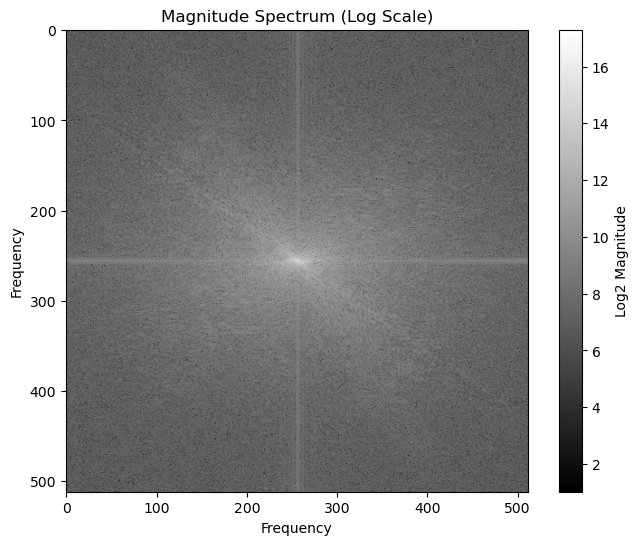

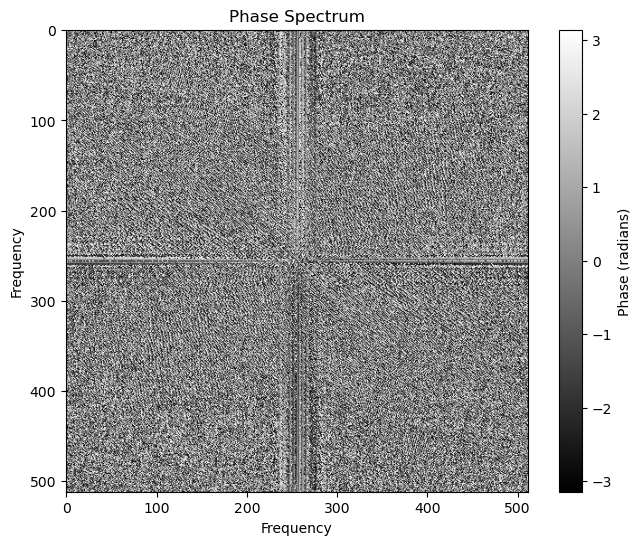

In [3]:
h,w = img.shape
dft_matrix_h = trans_utils.getMatrix(type=TransType.DFT, size=h)
dft_matrix_w  = trans_utils.getMatrix(type=TransType.DFT, size=w)
img_dft = np.dot(
    np.dot(dft_matrix_h, img),
    dft_matrix_w
)
trans_utils.plotSpectrum(matrix=img_dft)

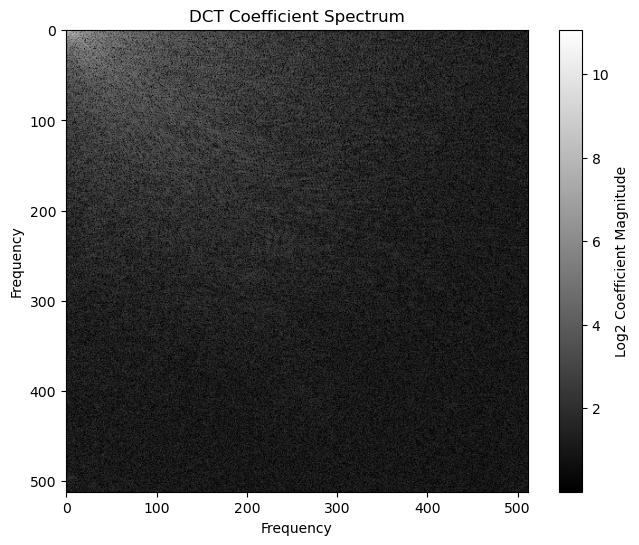

In [4]:
dct_matrix_h = trans_utils.getMatrix(type=TransType.DCT, size=h)
dct_matrix_w = trans_utils.getMatrix(type=TransType.DCT, size=w)
img_dct = np.dot(np.dot(dct_matrix_h, img), dct_matrix_w.T)

trans_utils.plotSpectrum(matrix=img_dct,transform_type=TransType.DCT)

In [ ]:
# 限制小数点位数
pprint(np.round(dft_matrix, 2))
pprint(np.round(dct_matrix, 2))
pprint(np.round(hadamard_matrix, 2))
pprint(np.round(haar_matrix, 2))